In [1]:
import argoverse

In [2]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

##set root_dir to the correct path to your dataset folder
root_dir = '/Users/iremdemir/Desktop/JupyterNotebook/SIMPL/Dataset/argodataset/argoverse/train/data/'

afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 205942


In [3]:
print(afl[4])

Seq : /Users/iremdemir/Desktop/JupyterNotebook/SIMPL/Dataset/argodataset/argoverse/train/data/145798.csv
        ----------------------
        || City: PIT
        || # Tracks: 16
        ----------------------


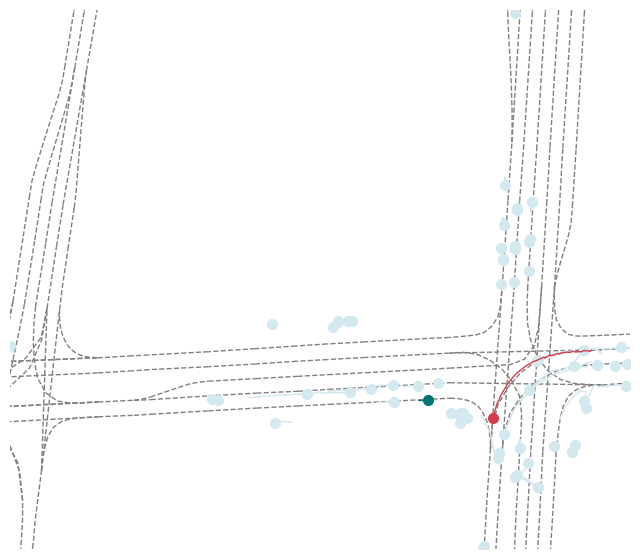

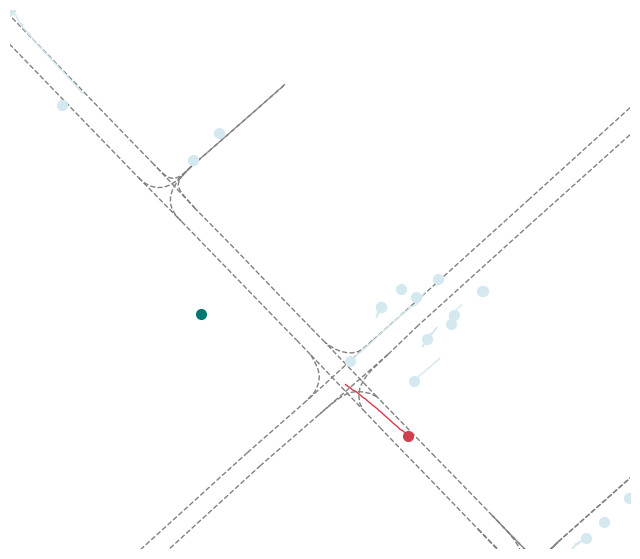

In [4]:
from argoverse.visualization.visualize_sequences import viz_sequence
seq_path = f"{root_dir}/2645.csv"
viz_sequence(afl.get(seq_path).seq_df, show=True)
seq_path = f"{root_dir}/3828.csv"
viz_sequence(afl.get(seq_path).seq_df, show=True)


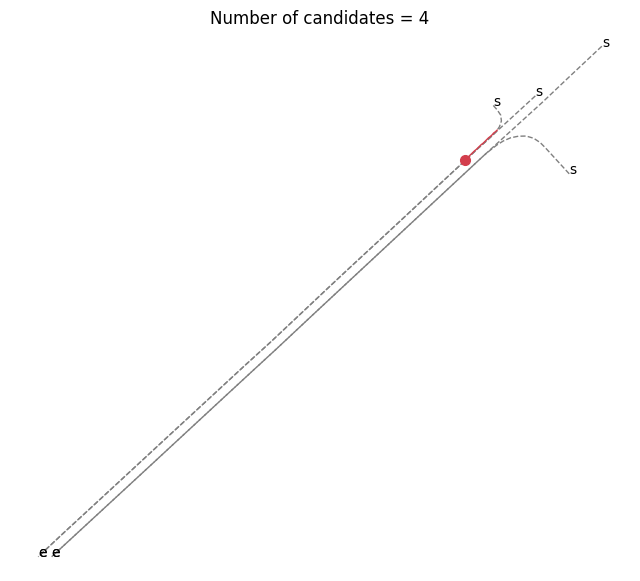

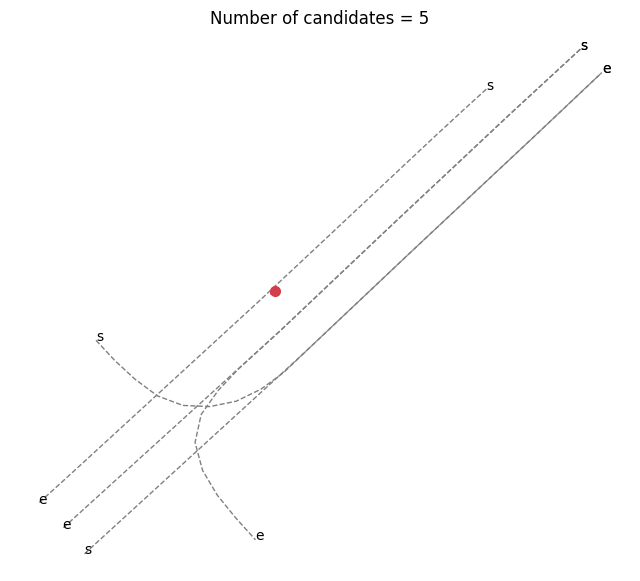

In [5]:
from argoverse.map_representation.map_api import ArgoverseMap

avm = ArgoverseMap()

obs_len = 20

index = 2
seq_path = afl.seq_list[index]
agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

index = 3
seq_path = afl.seq_list[index]
agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

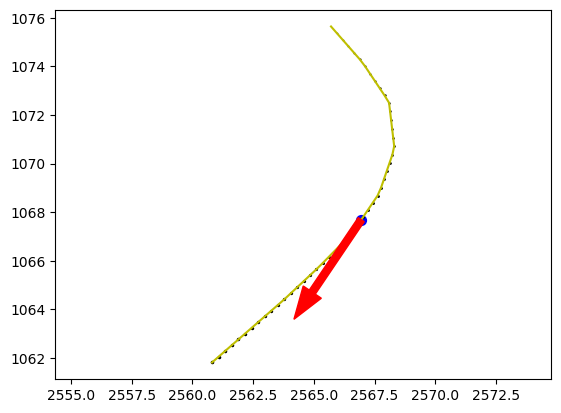

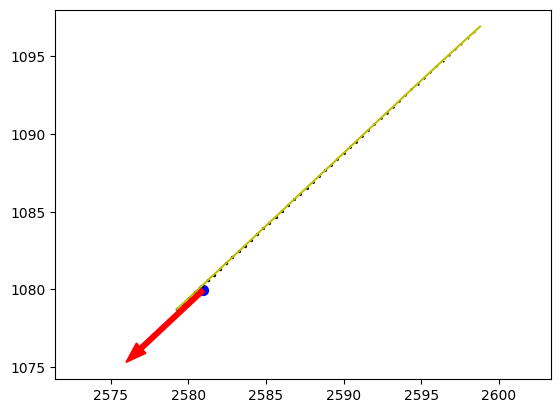

In [6]:
index = 2
seq_path = afl.seq_list[index]
agent_traj = afl.get(seq_path).agent_traj
lane_direction = avm.get_lane_direction(agent_traj[0], afl[index].city, visualize=True)

index = 3
seq_path = afl.seq_list[index]
agent_traj = afl.get(seq_path).agent_traj
lane_direction = avm.get_lane_direction(agent_traj[0], afl[index].city, visualize=True)

### competition_forecasting_tutorial

In [7]:
def prediction(trajectory,num_points=30,avg_points=1):
    #a simple prediction function that predict straight line with constant velocity
    velocity_x_mps = []
    velocity_y_mps = []
    for i in range(1,avg_points+1,1):
        velocity_x_mps.append(trajectory[-i,0] - trajectory[-(1+i),0])
        velocity_y_mps.append(trajectory[-i,1] - trajectory[-(1+i),1])
        
    velocity_x_mps = np.mean(velocity_x_mps)
    velocity_y_mps = np.mean(velocity_y_mps)
    
    current_traj = trajectory[-1]
    results = np.zeros((len(trajectory)+num_points,2))
    
    results[0:len(trajectory)] = trajectory
    
    for i in range(num_points):
        results[len(trajectory)+i] = np.array([current_traj[0]+velocity_x_mps,current_traj[1]+velocity_y_mps])
        current_traj = results[len(trajectory)+i]
    return results

In [8]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

##set root_dir to the correct path to your dataset folder
root_dir = '/Users/iremdemir/Desktop/JupyterNotebook/SIMPL/Dataset/argodataset/argoverse/test_obs/data/'

afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 78143


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [10]:
afl = afl[111]
predict_traj = prediction(afl.agent_traj,avg_points=5)

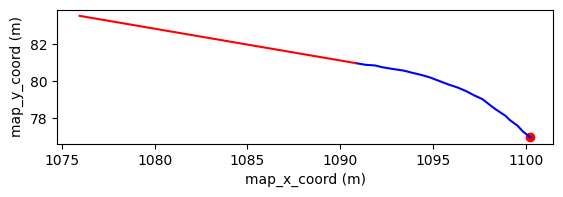

In [11]:
ax = plt.gca()
plt.plot(predict_traj[0,0],predict_traj[0,1],'-o',c='r') #starting point here
plt.plot(predict_traj[:21,0],predict_traj[:21,1],'-',c='b')
plt.plot(predict_traj[20:,0],predict_traj[20:,1],'-',c='r')

plt.xlabel('map_x_coord (m)')
plt.ylabel('map_y_coord (m)')
ax.set_aspect('equal')
plt.show()


In [12]:
def get_multiple_forecasts(afl):
    predict_traj = []
    for i in range(9,3,-1):
        predict_traj.append(prediction(afl.agent_traj,avg_points=(i)))
    return np.array(predict_traj)

In [13]:
predict_traj = get_multiple_forecasts(afl)

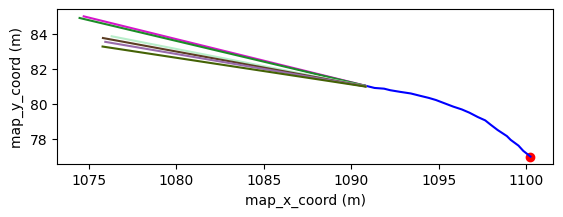

In [14]:
ax = plt.gca()

plt.plot(predict_traj[0,0,0],predict_traj[0,0,1],'-o',c='r') #starting point here
plt.plot(predict_traj[0,:21,0],predict_traj[0,:21,1],'-',c='b')

for i in range(len(predict_traj)):
    plt.plot(predict_traj[i,20:,0],predict_traj[i,20:,1],'-',c=np.random.rand(3,))
plt.xlabel('map_x_coord (m)')
plt.ylabel('map_y_coord (m)')
ax.set_aspect('equal')
plt.show()

In [34]:
output_all = {}
counter = 1
for data in afl:
    print('\r'+str(counter)+'/'+str(len(afl)),end="")
    predict_traj = get_multiple_forecasts(data)
    seq_id = int(data.current_seq.name[:-4])
    output_all[seq_id] = predict_traj[:,20:,:]
    counter += 1

30315/78143

KeyboardInterrupt: 